# News Classification

Purpose: To perform classification of different topic in News Headlines using Naive Bayes Classifier

URL = [link](https://www.youtube.com/watch?v=60pqgfT5tZM&ab_channel=SimplilearnSimplilearnVerified)

# Import Modules

In [33]:
from sklearn.datasets import fetch_20newsgroups

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set()

## Processing

In [2]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
categories = ['alt.atheism', 'comp.graphics',
              'comp.os.ms-windows.misc', 
              'comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware', 
              'comp.windows.x', 'misc.forsale', 
              'rec.autos', 'rec.motorcycles',
              'rec.sport.baseball',
              'rec.sport.hockey',
              'sci.crypt', 'sci.electronics',
              'sci.med', 'sci.space',
              'soc.religion.christian',
              'talk.politics.guns',
              'talk.politics.mideast',
              'talk.politics.misc',
              'talk.religion.misc']

In [5]:
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [14]:
print(train.data[3])

From: jgreen@amber (Joe Green)
Subject: Re: Weitek P9000 ?
Organization: Harris Computer Systems Division
Lines: 14
Distribution: world
NNTP-Posting-Host: amber.ssd.csd.harris.com
X-Newsreader: TIN [version 1.1 PL9]

Robert J.C. Kyanko (rob@rjck.UUCP) wrote:
> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:
> > Anyone know about the Weitek P9000 graphics chip?
> As far as the low-level stuff goes, it looks pretty nice.  It's got this
> quadrilateral fill command that requires just the four points.

Do you have Weitek's address/phone number?  I'd like to get some information
about this chip.

--
Joe Green				Harris Corporation
jgreen@csd.harris.com			Computer Systems Division
"The only thing that really scares me is a person with no sense of humor."
						-- Jonathan Winters



In [8]:
print('Length of train data: ', len(train.data))
print('Length of test data: ', len(test.data))

Length of train data:  11314
Length of test data:  7532


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

## Implementation

Text(233.8531250000001, 0.5, 'predicted label')

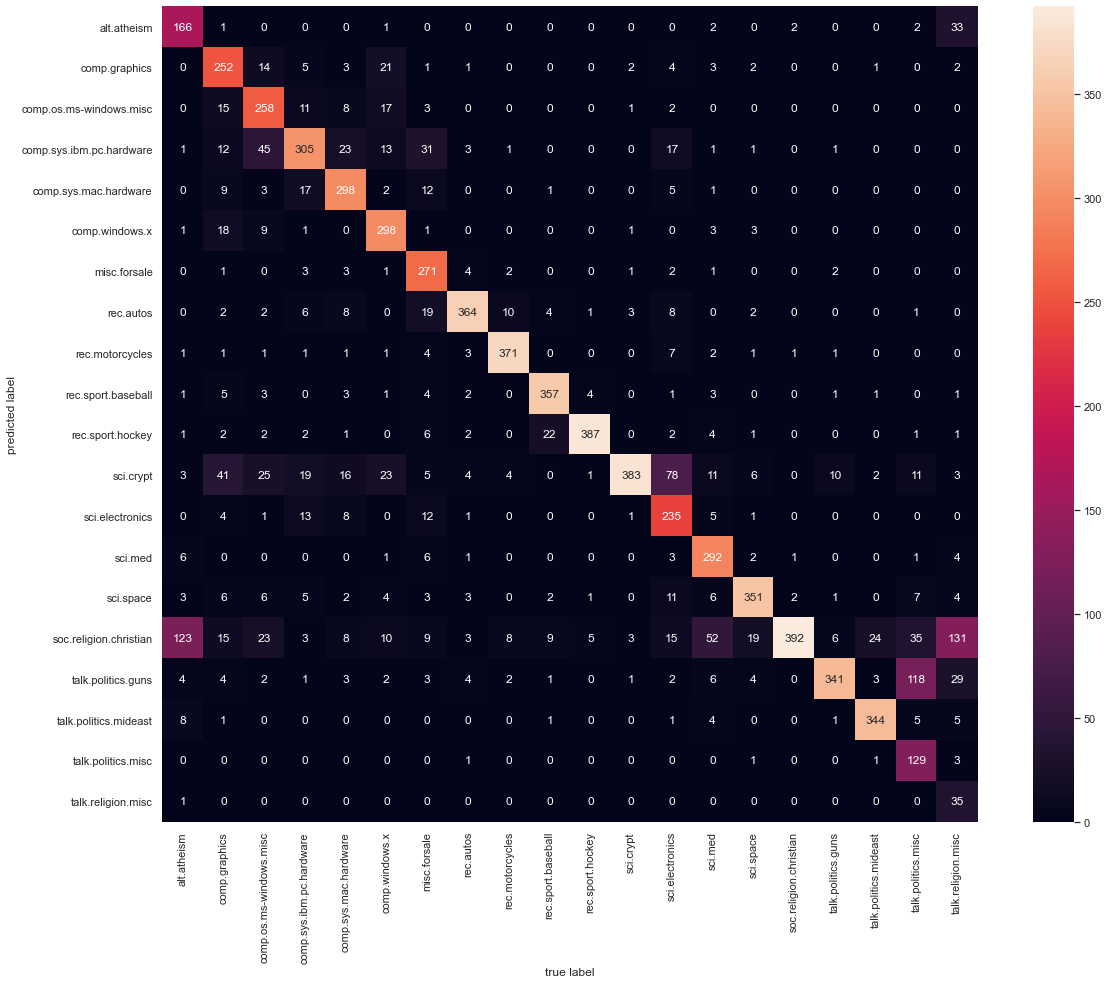

In [38]:
from sklearn.metrics import confusion_matrix

plt.subplots(figsize=(20,15))
matrix = confusion_matrix(test.target, labels)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=True,
           xticklabels=train.target_names, yticklabels=train.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')

In [39]:
def predict_category(s, train=train, model=model):
    predict = model.predict([s])
    return train.target_names[predict[0]]

In [40]:
predict_category('God Will Bless You')

'soc.religion.christian'

In [41]:
predict_category('War is begin')

'talk.politics.mideast'

In [42]:
predict_category('Fast and Furios had beed released')

'rec.autos'

In [43]:
predict_category('Mars is stated outside the outer ring of earth')

'sci.space'

In [44]:
predict_category('Mr.President had been arrived into the parliament meeting')

'talk.politics.mideast'

In [45]:
predict_category('The surgery is work well, and Mrs President is healthy')

'sci.med'